In [1]:
import numpy as np
import myUtil as mu
import matplotlib.pyplot as plt

In [2]:
#Generate 25 laws filters
K=np.array([[1,4,6,4,1],[-1,-2,0,2,1],[-1,0,2,0,-1],[-1,2,0,-2,1],[1,-4,6,-4,1]])
N=len(K)
laws_filters=np.zeros((N*N,N,N))
for i in range(N):
    for j in range(N):
        laws_filters[i*N+j]=np.matmul(K[i][:,np.newaxis],K[j][np.newaxis,:])

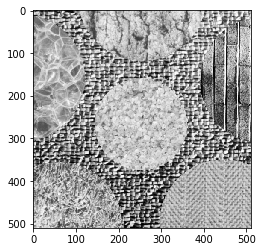

In [3]:
path_base="./HW4_Images/"
image=mu.readRaw(path_base+"comb.raw",510,510)
plt.imshow(image,cmap='gray')

In [8]:
def do_filter_by_filterset(img,filters):
    [height,width]=img.shape
    [N,_,_]=filters.shape
    res=np.zeros((height,width,N))
    for n in range(N):
        print("doing filter",n)
        res[:,:,n]=mu.do_filter(img,filters[n])
    return res

def getPixelEnergy(filters_res,w_size):
    [height,width,N]=filters_res.shape
    w=w_size//2
    res=np.zeros((height,width,N))
    for i in range(height):
        for j in range(width):
            win=filters_res[max(i-w,0):min(i+w+1,height),max(j-w+1,0):min(j+w,width),N]
            [w_t,h_t,_]=win.shape
            res[i,j,:]=np.mean(np.mean(win**2,axis=0),axis=0)
    return res


In [9]:
filtered_res=do_filter_by_filterset(image,laws_filters)
print(filtered_res.shape)

doing filter 0
doing filter 1
doing filter 2
doing filter 3
doing filter 4
doing filter 5
doing filter 6
doing filter 7
doing filter 8
doing filter 9
doing filter 10
doing filter 11
doing filter 12
doing filter 13
doing filter 14
doing filter 15
doing filter 16
doing filter 17
doing filter 18
doing filter 19
doing filter 20
doing filter 21
doing filter 22
doing filter 23
doing filter 24
(510, 510, 25)


In [ ]:
w_size=5
energy_map=getPixelEnergy(filtered_res,w_size)